<a href="https://colab.research.google.com/github/ShionFujimori/covid19-analysis/blob/master/covid19_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Insalling Prerequisite
1. Install libraries
2. Set up the kaggle API

In [3]:
# install libraries
import pandas as pd
import numpy as np
import seaborn as sns
from google.colab import drive
import zipfile
import matplotlib.pyplot as plt
%matplotlib inline

# plotly: interactive graphing library for Python
import plotly.offline as py
import plotly.express as px

# install pycountry_convert library
!pip install pycountry_convert
import pycountry_convert as pc

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


     |████████████████████████████████| 10.1MB 5.5MB/s 
     |████████████████████████████████| 235kB 45.7MB/s 
  Created wheel for pycountry: filename=pycountry-20.7.3-py2.py3-none-any.whl size=10746865 sha256=b07670cde7711d3131f680d0b73d045ba05ff897b957599b7100f6f133f03bc5
  Stored in directory: /root/.cache/pip/wheels/33/4e/a6/be297e6b83567e537bed9df4a93f8590ec01c1acfbcd405348
Successfully built pycountry
ERROR: datascience 0.10.6 has requirement coverage==3.7.1, but you'll have coverage 5.3 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: coveralls 0.5 has requirement coverage<3.999,>=3.6, but you'll have coverage 5.3 which is incompatible.
ERROR: pytest-mock 3.3.1 has requirement pytest>=5.0, but you'll have pytest 3.6.4 which is incompatible.
ERROR: pytest-cov 2.10.1 has requirement pytest>=4.6, but you'll have pytest 3.6.4 which is incompatible.
  Found existing installation: coverage 3.7.1

In [4]:
# setup the kaggle API
drive.mount('/content/drive')

!mkdir -p ~/.kaggle
!cp 'drive/My Drive/Colab Notebooks/kaggle/kaggle.json' ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!pip install --upgrade --force-reinstall --no-deps kaggle

Mounted at /content/drive
     |████████████████████████████████| 61kB 2.7MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.8-cp36-none-any.whl size=73275 sha256=241000777d529de279240e044ebce440a84a0115e0b0f725c7dab208215c73fa
  Stored in directory: /root/.cache/pip/wheels/94/a7/09/68dc83c7c14fdbdf5d3f2b2da5b87e587bfc1e85df69b1130c
Successfully built kaggle
  Found existing installation: kaggle 1.5.8
    Uninstalling kaggle-1.5.8:
      Successfully uninstalled kaggle-1.5.8


# Novel Corona Virus 2019 Dataset by SRK
1. covid_19_data.csv

## Download the dataset

In [9]:
# load datasets (kaggle: Novel-Corona-Virus-2019-dataset managed by SRK)
!kaggle datasets download -d sudalairajkumar/novel-corona-virus-2019-dataset -f covid_19_data.csv

with zipfile.ZipFile('./494724%2F1487043%2Fcompressed%2Fcovid_19_data.csv.zip', 'r') as zip_ref:
  zip_ref.extractall('./covid_19_data')

494724%2F1487043%2Fcompressed%2Fcovid_19_data.csv.zip: Skipping, found more recently modified local copy (use --force to force download)


## Overall Data Info
1. Read the csv file and observe the overall data
2. Observe the daily transition of COVID-19 cases

In [13]:
# obtain data using Pandas
data = pd.read_csv("./covid_19_data/covid_19_data.csv", index_col="SNo", parse_dates=["ObservationDate", "Last Update"])
print(f"Data shape: {data.shape}\n")

data

Data shape: (109382, 7)



ObservationDate     Province/State  ...  Deaths Recovered
SNo                                        ...                  
1           2020-01-22              Anhui  ...     0.0       0.0
2           2020-01-22            Beijing  ...     0.0       0.0
3           2020-01-22          Chongqing  ...     0.0       0.0
4           2020-01-22             Fujian  ...     0.0       0.0
5           2020-01-22              Gansu  ...     0.0       0.0
...                ...                ...  ...     ...       ...
109378      2020-09-13  Zaporizhia Oblast  ...    33.0    1055.0
109379      2020-09-13            Zeeland  ...    72.0       0.0
109380      2020-09-13           Zhejiang  ...     1.0    1268.0
109381      2020-09-13    Zhytomyr Oblast  ...    82.0    2352.0
109382      2020-09-13       Zuid-Holland  ...  1354.0       0.0

[109382 rows x 7 columns]

In [14]:
# summary function (not very useful here)
data.describe()

Confirmed         Deaths     Recovered
count  1.093820e+05  109382.000000  1.093820e+05
mean   1.758725e+04     743.484056  1.002470e+04
std    5.350244e+04    2796.896571  5.647842e+04
min    0.000000e+00       0.000000  0.000000e+00
25%    2.160000e+02       3.000000  3.000000e+00
50%    1.926000e+03      38.000000  3.560000e+02
75%    9.550750e+03     305.000000  3.395000e+03
max    1.037765e+06   42072.000000  2.451406e+06

In [15]:
# obtain ObservationDate vs (Confirmed/Deaths/Recovered) data
confirmed_vs_date = data.groupby("ObservationDate").Confirmed.sum()
deaths_vs_date = data.groupby("ObservationDate").Deaths.sum()
recovered_vs_date = data.groupby("ObservationDate").Recovered.sum()

daily_data = pd.concat([confirmed_vs_date, deaths_vs_date, recovered_vs_date], axis=1).astype("int32")
daily_data

Confirmed  Deaths  Recovered
ObservationDate                              
2020-01-22             555      17         28
2020-01-23             653      18         30
2020-01-24             941      26         36
2020-01-25            1438      42         39
2020-01-26            2118      56         52
...                    ...     ...        ...
2020-09-09        27863733  903686   18776723
2020-09-10        28161885  909479   18992383
2020-09-11        28481413  915356   19215800
2020-09-12        28759036  920231   19439157
2020-09-13        28902753  922737   19547423

[236 rows x 3 columns]

## Visualize the data
1. Cumulative Confirmed Cases vs Observation Date
2. Cumulative Deaths vs Observation Date
3. Cumulative Recovered Cases vs Observation Date

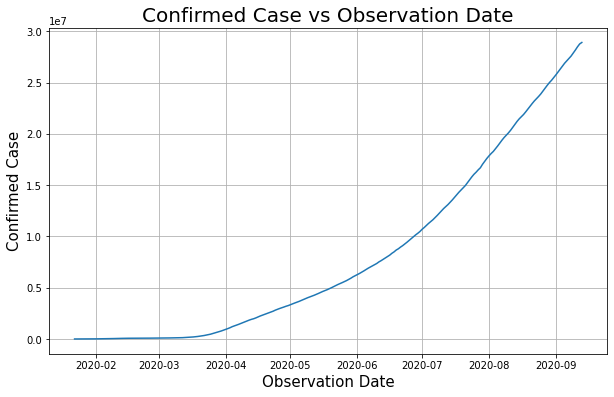

In [16]:
# visualize the data
plt.figure(figsize=(10, 6))
sns.lineplot(x=daily_data.index, y=daily_data.Confirmed)
plt.grid()
plt.title("Confirmed Case vs Observation Date", fontsize=20)
plt.ylabel("Confirmed Case", fontsize=15)
plt.xlabel("Observation Date", fontsize=15)
plt.show()

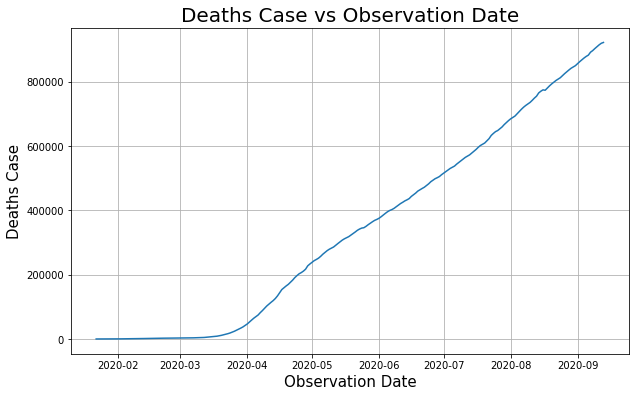

In [17]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=daily_data.index, y=daily_data.Deaths)
plt.grid()
plt.title("Deaths Case vs Observation Date", fontsize=20)
plt.ylabel("Deaths Case", fontsize=15)
plt.xlabel("Observation Date", fontsize=15)
plt.show()

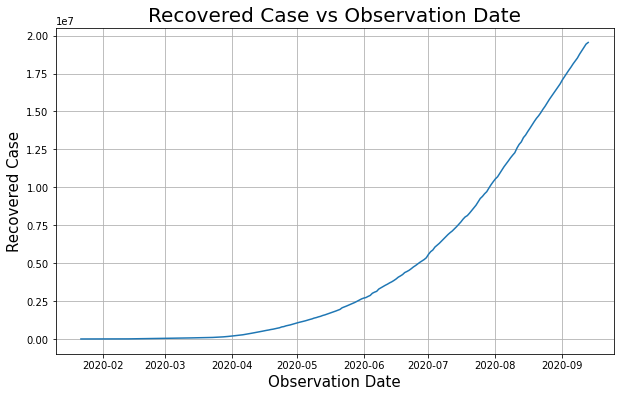

In [18]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=daily_data.index, y=daily_data.Recovered)
plt.grid()
plt.title("Recovered Case vs Observation Date", fontsize=20)
plt.ylabel("Recovered Case", fontsize=15)
plt.xlabel("Observation Date", fontsize=15)
plt.show()

## Daily transition of COVID-19 cases
1. Group the data by observed date and country
2. China -- daily transition
3. USA -- daily transition
4. Japan -- daily transition

In [19]:
# Group the data by ObservationDate and Country/Region
daily_country_data = data.groupby(["ObservationDate", "Country/Region"]) \
                    [["Confirmed", "Deaths", "Recovered"]].sum().reset_index()

daily_country_data

ObservationDate      Country/Region  Confirmed  Deaths  Recovered
0          2020-01-22           Hong Kong        0.0     0.0        0.0
1          2020-01-22               Japan        2.0     0.0        0.0
2          2020-01-22               Macau        1.0     0.0        0.0
3          2020-01-22      Mainland China      547.0    17.0       28.0
4          2020-01-22         South Korea        1.0     0.0        0.0
...               ...                 ...        ...     ...        ...
36926      2020-09-13  West Bank and Gaza    30574.0   221.0    20082.0
36927      2020-09-13      Western Sahara       10.0     1.0        8.0
36928      2020-09-13               Yemen     2011.0   583.0     1212.0
36929      2020-09-13              Zambia    13539.0   312.0    12260.0
36930      2020-09-13            Zimbabwe     7526.0   224.0     5678.0

[36931 rows x 5 columns]

In [20]:
# Example 1: China -- daily transition
daily_country_data.query('`Country/Region` == "Mainland China"').set_index("ObservationDate")

Country/Region  Confirmed  Deaths  Recovered
ObservationDate                                              
2020-01-22       Mainland China      547.0    17.0       28.0
2020-01-23       Mainland China      639.0    18.0       30.0
2020-01-24       Mainland China      916.0    26.0       36.0
2020-01-25       Mainland China     1399.0    42.0       39.0
2020-01-26       Mainland China     2062.0    56.0       49.0
...                         ...        ...     ...        ...
2020-09-09       Mainland China    85153.0  4634.0    80354.0
2020-09-10       Mainland China    85168.0  4634.0    80377.0
2020-09-11       Mainland China    85174.0  4634.0    80381.0
2020-09-12       Mainland China    85184.0  4634.0    80395.0
2020-09-13       Mainland China    85194.0  4634.0    80410.0

[236 rows x 4 columns]

In [21]:
# Example 2: US -- daily transition
daily_country_data.query('`Country/Region` == "US"').set_index("ObservationDate")

Country/Region  Confirmed    Deaths  Recovered
ObservationDate                                               
2020-01-22                  US        1.0       0.0        0.0
2020-01-23                  US        1.0       0.0        0.0
2020-01-24                  US        2.0       0.0        0.0
2020-01-25                  US        2.0       0.0        0.0
2020-01-26                  US        5.0       0.0        0.0
...                        ...        ...       ...        ...
2020-09-09                  US  6361265.0  190859.0  2387479.0
2020-09-10                  US  6396551.0  191766.0  2403511.0
2020-09-11                  US  6443743.0  192979.0  2417878.0
2020-09-12                  US  6485214.0  193693.0  2434658.0
2020-09-13                  US  6519573.0  194071.0  2451406.0

[236 rows x 4 columns]

In [22]:
# Example 3: Japan -- daily transition
daily_country_data.query('`Country/Region` == "Japan"').set_index("ObservationDate")

Country/Region  Confirmed  Deaths  Recovered
ObservationDate                                             
2020-01-22               Japan        2.0     0.0        0.0
2020-01-23               Japan        1.0     0.0        0.0
2020-01-24               Japan        2.0     0.0        0.0
2020-01-25               Japan        2.0     0.0        0.0
2020-01-26               Japan        4.0     0.0        1.0
...                        ...        ...     ...        ...
2020-09-09               Japan    73264.0  1412.0    63734.0
2020-09-10               Japan    73916.0  1416.0    64489.0
2020-09-11               Japan    74558.0  1428.0    65244.0
2020-09-12               Japan    75206.0  1441.0    65934.0
2020-09-13               Japan    75646.0  1448.0    66524.0

[236 rows x 4 columns]

## Choropleth Graph
1. The Spread of COVID-19 Cases Across World
2. The Spread of COVID-19 Deaths Across World
3. The COVID-19 Recovery Rate Across World

In [23]:
# obtain a copy of daily_country_data
choropleth_data = daily_country_data.copy()

# fix ObservationDate datatype from Timesatmp to String
choropleth_data.ObservationDate = choropleth_data.ObservationDate.astype(str)

# take logarithms (Confirmed, Deaths, Recovered)
choropleth_data["Confirmed (logarithmic scale)"] = np.log1p(choropleth_data.Confirmed)
choropleth_data["Deaths (logarithmic scale)"] = np.log1p(choropleth_data.Deaths)
choropleth_data["Recovered (logarithmic scale)"] = np.log1p(choropleth_data.Recovered)

# calculate the recovery rate
choropleth_data["RecoveryRate"] = (choropleth_data.Recovered / (choropleth_data.Confirmed+1e-6)).round(3)

In [24]:
# Plotting a Running Map for observing the spread of COVID-19 Confirmed Cases
fig = px.choropleth(choropleth_data, 
                    locations="Country/Region", 
                    locationmode='country names', 
                    color="Confirmed (logarithmic scale)", 
                    hover_name="Country/Region",
                    projection="mercator",
                    animation_frame="ObservationDate",
                    width=1000, 
                    height=800,
                    color_continuous_scale=px.colors.sequential.Oranges,
                    title='The Spread of COVID-19 Cases Across World')

py.offline.iplot(fig)

In [25]:
# Plotting a Running Map for observing the spread of COVID-19 deaths
fig = px.choropleth(choropleth_data, 
                    locations="Country/Region", 
                    locationmode='country names', 
                    color="Deaths (logarithmic scale)",
                    hover_name="Country/Region",
                    projection="mercator",
                    animation_frame="ObservationDate",
                    width=1000, 
                    height=800,
                    color_continuous_scale=px.colors.sequential.Oranges,
                    title='The Spread of COVID-19 Deaths Across World')

py.offline.iplot(fig)

In [26]:
# Plotting a Running Map for observing the COVID-19 recovery rate
fig = px.choropleth(choropleth_data, 
                    locations="Country/Region", 
                    locationmode='country names', 
                    color="RecoveryRate",
                    hover_name="Country/Region",
                    projection="mercator",
                    animation_frame="ObservationDate",
                    width=1000, 
                    height=800,
                    color_continuous_scale=px.colors.sequential.Oranges,
                    title='The COVID-19 Recovery Rate Across World')

py.offline.iplot(fig)

## Country-wise reported cases

In [27]:
newest_date = daily_country_data.ObservationDate.iloc[-1]

countrywise_data = daily_country_data.query("ObservationDate == @newest_date")
countrywise_data = countrywise_data.groupby("Country/Region")[["Confirmed", "Deaths", "Recovered"]].sum()
countrywise_data = countrywise_data.sort_values("Confirmed", ascending=False).astype("int32")

# Add "Active" cases column
countrywise_data["Active"] = \
  (countrywise_data.Confirmed - countrywise_data.Deaths - countrywise_data.Recovered).astype("int32")

# Add "MortalityRate(%)" column
countrywise_data["MortalityRate(%)"] = \
  (100 * countrywise_data.Deaths / countrywise_data.Confirmed).round(1)

# Color the background in a gradient
countrywise_data.style \
  .background_gradient(cmap='Blues',subset=["Confirmed"]) \
  .background_gradient(cmap='Reds',subset=["Deaths"]) \
  .background_gradient(cmap='Greens',subset=["Recovered"]) \
  .background_gradient(cmap='Oranges',subset=["Active"]) \
  .background_gradient(cmap='Purples',subset=["MortalityRate(%)"])

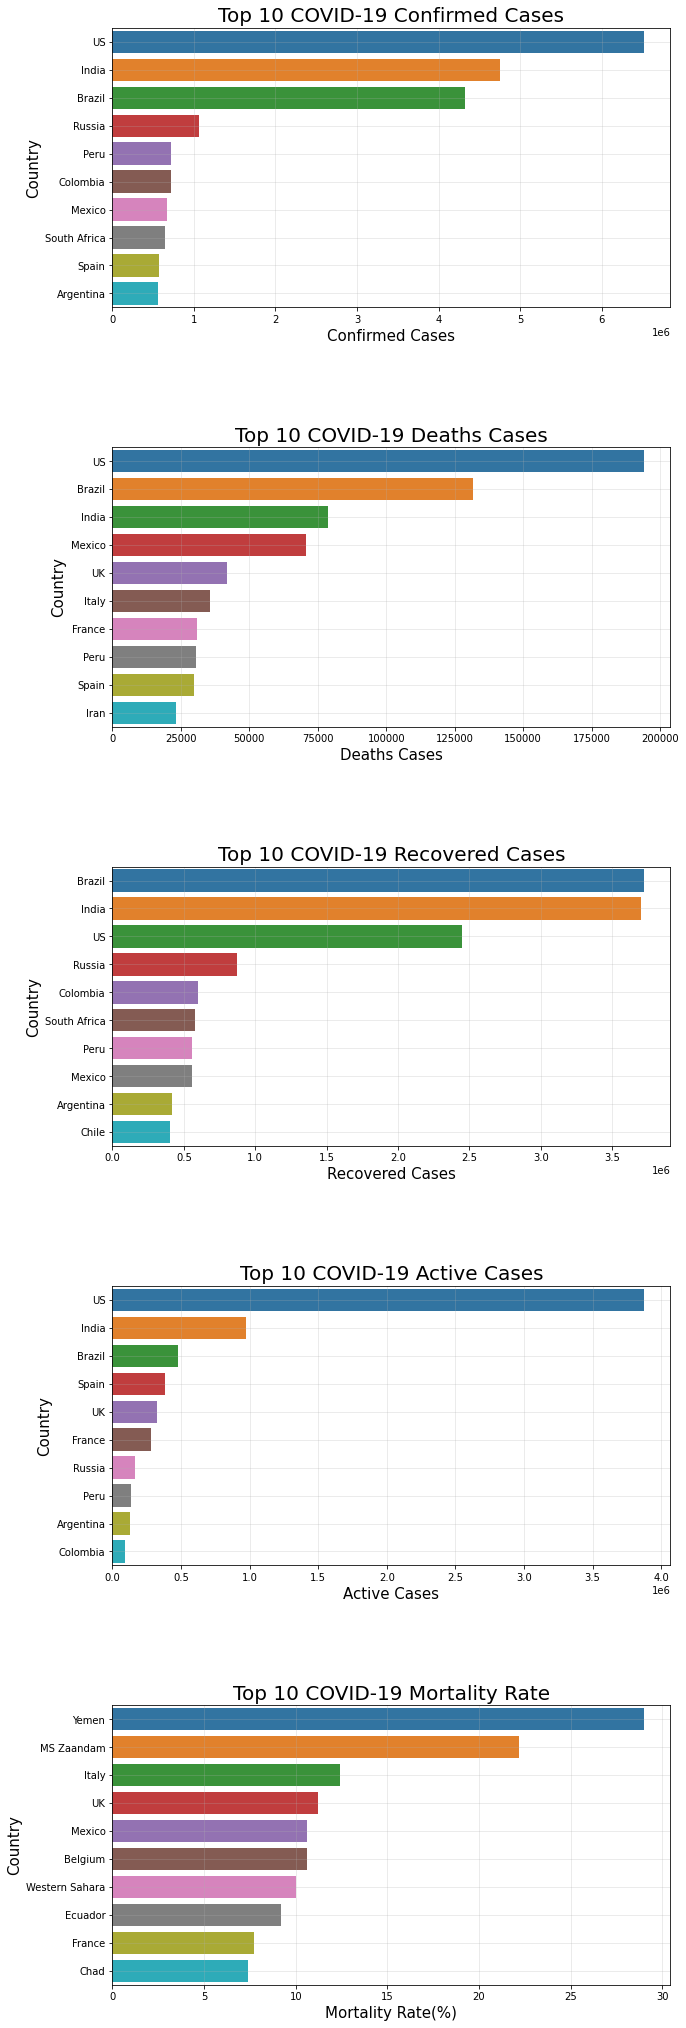

In [28]:
# === Top 10 bar plots ===
fig = plt.figure(figsize=(10, 36))

# Confirmed cases
sns.barplot(x=countrywise_data["Confirmed"][:10], 
            y=countrywise_data.index[:10],
            ax=fig.add_subplot(5, 1, 1))
plt.grid(alpha=0.3)
plt.title("Top 10 COVID-19 Confirmed Cases", fontsize=20)
plt.ylabel("Country", fontsize=15)
plt.xlabel("Confirmed Cases", fontsize=15)

# Deaths cases
temp = countrywise_data.sort_values("Deaths", ascending=False)
sns.barplot(x=temp["Deaths"][:10], 
            y=temp.index[:10],
            ax=fig.add_subplot(5, 1, 2))
plt.grid(alpha=0.3)
plt.title("Top 10 COVID-19 Deaths Cases", fontsize=20)
plt.ylabel("Country", fontsize=15)
plt.xlabel("Deaths Cases", fontsize=15)

# Recovered cases
temp = countrywise_data.sort_values("Recovered", ascending=False)
sns.barplot(x=temp["Recovered"][:10], 
            y=temp.index[:10],
            ax=fig.add_subplot(5, 1, 3))
plt.grid(alpha=0.3)
plt.title("Top 10 COVID-19 Recovered Cases", fontsize=20)
plt.ylabel("Country", fontsize=15)
plt.xlabel("Recovered Cases", fontsize=15)

# Active cases
temp = countrywise_data.sort_values("Active", ascending=False)
sns.barplot(x=temp["Active"][:10], 
            y=temp.index[:10],
            ax=fig.add_subplot(5, 1, 4))
plt.grid(alpha=0.3)
plt.title("Top 10 COVID-19 Active Cases", fontsize=20)
plt.ylabel("Country", fontsize=15)
plt.xlabel("Active Cases", fontsize=15)

# Mortality rate
temp = countrywise_data.sort_values("MortalityRate(%)", ascending=False)
sns.barplot(x=temp["MortalityRate(%)"][:10], 
            y=temp.index[:10],
            ax=fig.add_subplot(5, 1, 5))
plt.grid(alpha=0.3)
plt.title("Top 10 COVID-19 Mortality Rate", fontsize=20)
plt.ylabel("Country", fontsize=15)
plt.xlabel("Mortality Rate(%)", fontsize=15)

plt.subplots_adjust(hspace=0.5)
plt.show()

In [29]:
# country-wise correlation
countrywise_data.corr().style.background_gradient(cmap='Reds')

# COVID-19 Data Repository by Johns Hopkins CSSE
1. time_series_covid19_confirmed_global.csv
2. time_series_covid19_deaths_global.csv
3. time_series_covid19_recovered_global.csv
4. time_series_covid19_confirmed_US.csv
5. time_series_covid19_deaths_US.csv

## Download the dataset

In [30]:
# load datasets (2019 Novel Coronavirus COVID-19 (2019-nCoV) Data Repository by Johns Hopkins CSSE)

df_confirmed = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
df_deaths = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")
df_recovered = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv")
us_confirmed = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv")
us_deaths = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv")

## Preprocessing the data
Global data:
1. Simplify the column name
2. Drop irrelevant columns
3. Group by country
4. Add "Continent" column

USA data:
1. Simplify the column name
2. Drop irrelevant columns
3. Group by country
4. Add "Population" column in us_confirmed

In [31]:
# === Global data preprocessing ===

# change the column name
df_confirmed = df_confirmed.rename(columns={"Country/Region": "Country"})
df_deaths = df_deaths.rename(columns={"Country/Region": "Country"})
df_recovered = df_recovered.rename(columns={"Country/Region": "Country"})

# drop irrelevant columns
df_confirmed = df_confirmed.drop(["Lat", "Long", "Province/State"], axis=1)
df_deaths = df_deaths.drop(["Lat", "Long", "Province/State"], axis=1)
df_recovered = df_recovered.drop(["Lat", "Long", "Province/State"], axis=1)

# group by country 
df_confirmed = df_confirmed.groupby("Country").sum().reset_index()
df_deaths = df_deaths.groupby("Country").sum().reset_index()
df_recovered = df_recovered.groupby("Country").sum().reset_index()

# pycountry_convert - Library for getting continent name from their country names
# Changing the conuntry names as required by pycountry_convert Library
# "US"                  -> "USA"
# "Korea, South"        -> "South Korea"
# "Taiwan*"             -> "Taiwan"
# "Congo (Kinshasa)"    -> "Democratic Republic of the Congo"
# "Cote d'Ivoire"       -> "Côte d'Ivoire"
# "Reunion"             -> "Réunion"
# "Congo (Brazzaville)" -> "Republic of the Congo"
# "Bahamas, The"        -> "Bahamas"
# "Gambia, The"         -> "Gambia"
df_confirmed.loc[df_confirmed.Country == "US", "Country"] = "USA"
df_confirmed.loc[df_confirmed.Country == "Korea, South", "Country"] = "South Korea"
df_confirmed.loc[df_confirmed.Country == "Taiwan*", "Country"] = "Taiwan"
df_confirmed.loc[df_confirmed.Country == "Congo (Kinshasa)", "Country"] = "Democratic Republic of the Congo"
df_confirmed.loc[df_confirmed.Country == "Cote d'Ivoire", "Country"] = "Côte d'Ivoire"
df_confirmed.loc[df_confirmed.Country == "Reunion", "Country"] = "Réunion"
df_confirmed.loc[df_confirmed.Country == "Congo (Brazzaville)", "Country"] = "Republic of the Congo"
df_confirmed.loc[df_confirmed.Country == "Bahamas, The", "Country"] = "Bahamas"
df_confirmed.loc[df_confirmed.Country == "Gambia, The", "Country"] = "Gambia"

df_deaths.loc[df_deaths.Country == "US", "Country"] = "USA"
df_deaths.loc[df_deaths.Country == "Korea, South", "Country"] = "South Korea"
df_deaths.loc[df_deaths.Country == "Taiwan*", "Country"] = "Taiwan"
df_deaths.loc[df_deaths.Country == "Congo (Kinshasa)", "Country"] = "Democratic Republic of the Congo"
df_deaths.loc[df_deaths.Country == "Cote d'Ivoire", "Country"] = "Côte d'Ivoire"
df_deaths.loc[df_deaths.Country == "Reunion", "Country"] = "Réunion"
df_deaths.loc[df_deaths.Country == "Congo (Brazzaville)", "Country"] = "Republic of the Congo"
df_deaths.loc[df_deaths.Country == "Bahamas, The", "Country"] = "Bahamas"
df_deaths.loc[df_deaths.Country == "Gambia, The", "Country"] = "Gambia"

df_recovered.loc[df_recovered.Country == "US", "Country"] = "USA"
df_recovered.loc[df_recovered.Country == "Korea, South", "Country"] = "South Korea"
df_recovered.loc[df_recovered.Country == "Taiwan*", "Country"] = "Taiwan"
df_recovered.loc[df_recovered.Country == "Congo (Kinshasa)", "Country"] = "Democratic Republic of the Congo"
df_recovered.loc[df_recovered.Country == "Cote d'Ivoire", "Country"] = "Côte d'Ivoire"
df_recovered.loc[df_recovered.Country == "Reunion", "Country"] = "Réunion"
df_recovered.loc[df_recovered.Country == "Congo (Brazzaville)", "Country"] = "Republic of the Congo"
df_recovered.loc[df_recovered.Country == "Bahamas, The", "Country"] = "Bahamas"
df_recovered.loc[df_recovered.Country == "Gambia, The", "Country"] = "Gambia"

# continent code -> continent name
continents = {
    'NA': 'North America',
    'SA': 'South America', 
    'AS': 'Asia',
    'OC': 'Australia',
    'AF': 'Africa',
    'EU' : 'Europe',
    'na' : 'Others'
}

# country name -> continent name
def cont_convert(country):
    try:
        continent_code = pc.country_alpha2_to_continent_code(pc.country_name_to_country_alpha2(country))
        return continents[continent_code]
    except :
        return "Others"

# inserting "Continent" column
df_confirmed.insert(1, "Continent", [cont_convert(country) for country in np.asarray(df_confirmed.Country)])
df_deaths.insert(1, "Continent",  [cont_convert(country) for country in np.asarray(df_deaths.Country)])
df_recovered.insert(1,"Continent",  [cont_convert(country) for country in np.asarray(df_recovered.Country)])

In [34]:
# visualize the global data after preprocessing
df_confirmed.sort_values(df_confirmed.columns[-1], ascending=False)

Country      Continent  1/22/20  ...  9/15/20  9/16/20  9/17/20
174                    USA  North America        1  ...  6591641  6630051  6674411
79                   India           Asia        0  ...  5020359  5020359  5118253
23                  Brazil  South America        0  ...  4382263  4419083  4455386
140                 Russia         Europe        0  ...  1069873  1075485  1081152
134                   Peru  South America        0  ...   733860   738020   744400
..                     ...            ...      ...  ...      ...      ...      ...
95                    Laos           Asia        0  ...       23       23       23
142  Saint Kitts and Nevis  North America        0  ...       17       17       17
75                Holy See         Others        0  ...       12       12       12
184         Western Sahara         Others        0  ...       10       10       10
104             MS Zaandam         Others        0  ...        9        9        9

[188 rows x 242 columns]

In [35]:
# === USA data preprocessing ===

# change the column name
us_confirmed = us_confirmed.rename(columns={"Province_State": "State"})
us_deaths = us_deaths.rename(columns={"Province_State": "State"})

# drop irrelevant columns
us_confirmed = us_confirmed.drop(["UID", "iso2", "iso3", "code3", "FIPS",
                                  "Admin2", "Lat", "Long_", "Combined_Key", 
                                  "Country_Region"], axis=1)
us_deaths = us_deaths.drop(["UID", "iso2", "iso3", "code3", "FIPS",
                                  "Admin2", "Lat", "Long_", "Combined_Key", 
                                  "Country_Region"], axis=1)

# group by country 
us_confirmed = us_confirmed.groupby("State").sum().reset_index()
us_deaths = us_deaths.groupby("State").sum().reset_index()

# Add "Population" column in us_confirmed
us_confirmed.insert(1, "Population", us_deaths.Population)

In [36]:
# visualize the USA data after preprocessing
us_confirmed.sort_values(us_confirmed.columns[-1], ascending=False).head()

State  Population  1/22/20  ...  9/15/20  9/16/20  9/17/20
5   California    39512223        0  ...   768204   771321   775037
49       Texas    28995881        0  ...   692753   696807   701350
11     Florida    21477737        0  ...   668846   671201   674456
36    New York    19453561        0  ...   445714   446366   447262
12     Georgia    10617423        0  ...   296994   299056   300903

[5 rows x 242 columns]

## Spread Trends
1. Number of countries affected over the time (Confirmed cases)
2. Number of countries affected over the time (Deaths cases)
3. Spread across Europe
4. Spread across Asia
5. Spread across North/South America

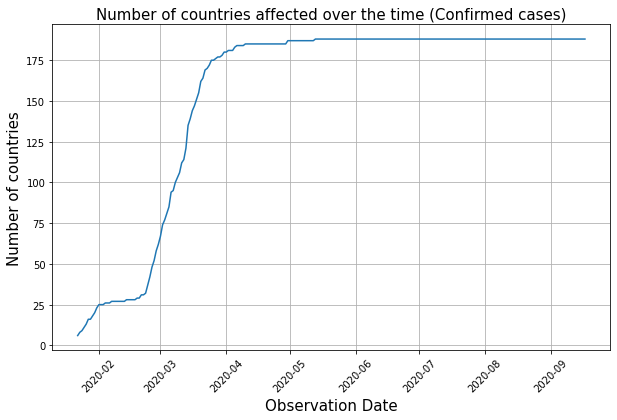

In [37]:
# Number of countries affected (confirmed cases)
num_country_confirmed = df_confirmed.set_index("Country") \
                            .drop(["Continent"], axis=1) \
                            .apply(lambda x: x[x > 0].count(), axis="index")
num_country_confirmed.index = pd.to_datetime(num_country_confirmed.index)

plt.figure(figsize=(10, 6))
sns.lineplot(data=num_country_confirmed)
plt.grid()
plt.xticks(rotation=45)
plt.title("Number of countries affected over the time (Confirmed cases)", fontsize=15)
plt.ylabel("Number of countries", fontsize=15)
plt.xlabel("Observation Date", fontsize=15)
plt.show()

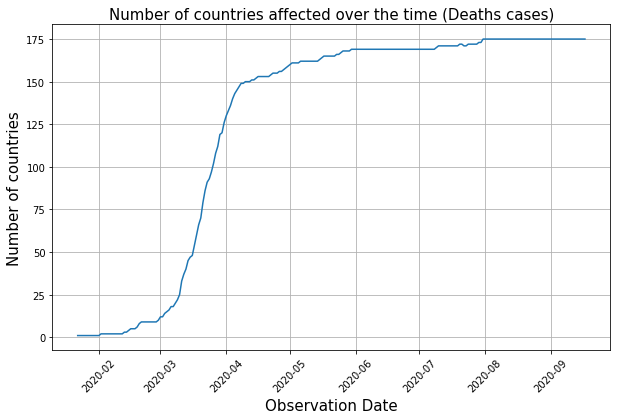

In [38]:
# Number of countries affected (deaths cases)
num_country_deaths = df_deaths.set_index("Country") \
                              .drop(["Continent"], axis=1) \
                              .apply(lambda x: x[x > 0].count(), axis="index")
num_country_deaths.index = pd.to_datetime(num_country_deaths.index)

plt.figure(figsize=(10, 6))
sns.lineplot(data=num_country_deaths)
plt.grid()
plt.xticks(rotation=45)
plt.title("Number of countries affected over the time (Deaths cases)", fontsize=15)
plt.ylabel("Number of countries", fontsize=15)
plt.xlabel("Observation Date", fontsize=15)
plt.show()

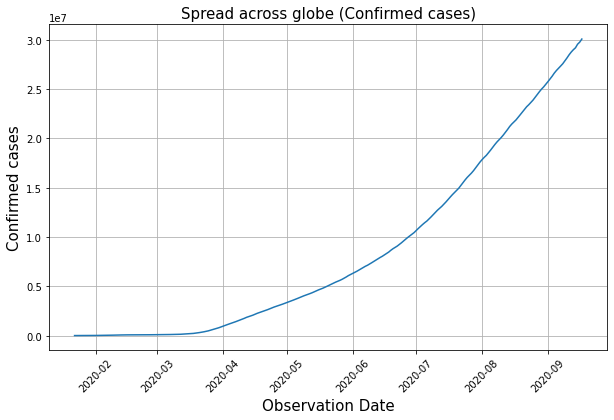

In [39]:
# Spread across globe (Confirmed cases)
global_confirmed = df_confirmed.drop(["Country", "Continent"], axis=1).sum()
global_confirmed.index = pd.to_datetime(global_confirmed.index)

plt.figure(figsize=(10, 6))
sns.lineplot(data=global_confirmed)
plt.grid()
plt.xticks(rotation=45)
plt.title("Spread across globe (Confirmed cases)", fontsize=15)
plt.ylabel("Confirmed cases", fontsize=15)
plt.xlabel("Observation Date", fontsize=15)
plt.show()

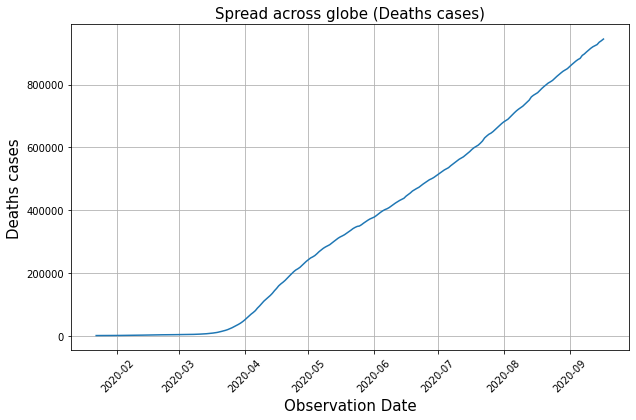

In [40]:
# Spread across globe (Deaths cases)
global_deaths = df_deaths.drop(["Country", "Continent"], axis=1).sum()
global_deaths.index = pd.to_datetime(global_deaths.index)

plt.figure(figsize=(10, 6))
sns.lineplot(data=global_deaths)
plt.grid()
plt.xticks(rotation=45)
plt.title("Spread across globe (Deaths cases)", fontsize=15)
plt.ylabel("Deaths cases", fontsize=15)
plt.xlabel("Observation Date", fontsize=15)
plt.show()

### Spread across different continents

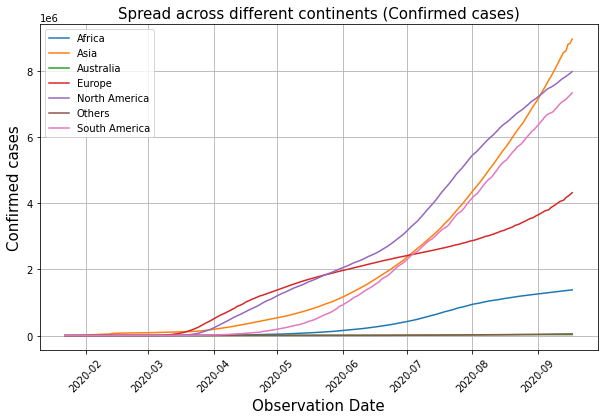

In [41]:
# Spread across continents
continents_confirmed = df_confirmed.drop(["Country"], axis=1).groupby("Continent").sum()

plt.figure(figsize=(10, 6))
for cont in continents_confirmed.index:
  sns.lineplot(x=pd.to_datetime(continents_confirmed.columns), y=continents_confirmed.loc[cont, :], label=cont)
plt.grid()
plt.xticks(rotation=45)
plt.title("Spread across different continents (Confirmed cases)", fontsize=15)
plt.ylabel("Confirmed cases", fontsize=15)
plt.xlabel("Observation Date", fontsize=15)
plt.show()

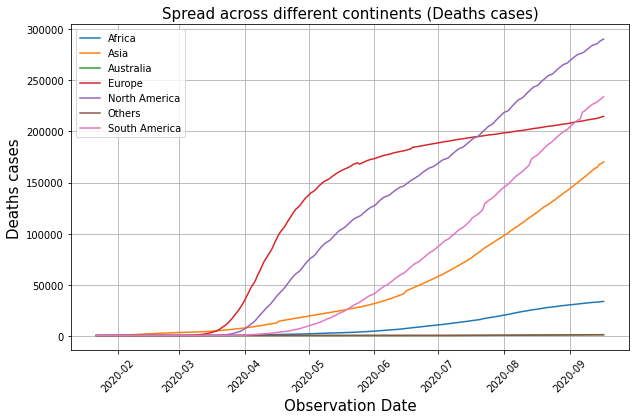

In [42]:
# Spread across continents (Deaths)
continents_deaths = df_deaths.drop(["Country"], axis=1).groupby("Continent").sum()

plt.figure(figsize=(10, 6))
for cont in continents_deaths.index:
  sns.lineplot(x=pd.to_datetime(continents_deaths.columns), y=continents_deaths.loc[cont, :], label=cont)
plt.grid()
plt.xticks(rotation=45)
plt.title("Spread across different continents (Deaths cases)", fontsize=15)
plt.ylabel("Deaths cases", fontsize=15)
plt.xlabel("Observation Date", fontsize=15)
plt.show()

### Spread across Europe 

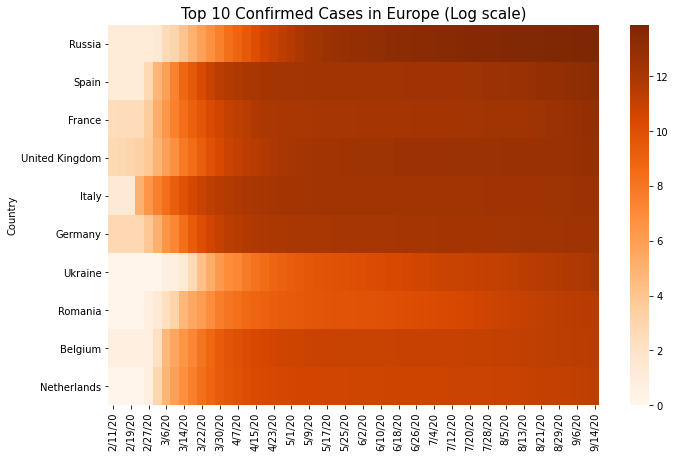

In [43]:
# Top 10 Confirmed Cases Heatmap
countries = np.asarray(df_confirmed.query("Continent == 'Europe'") \
  .sort_values(df_confirmed.columns[-1], ascending=False).Country[:10])

europe_confirmed_top = df_confirmed.set_index("Country").drop(["Continent"], axis=1).loc[countries,:]
temp = europe_confirmed_top.iloc[:, 20::4]
temp = np.log1p(temp)

plt.figure(figsize=(11, 7))
plt.title("Top 10 Confirmed Cases in Europe (Log scale)", fontsize=15)
sns.heatmap(data=temp, cmap="Oranges")
plt.show()

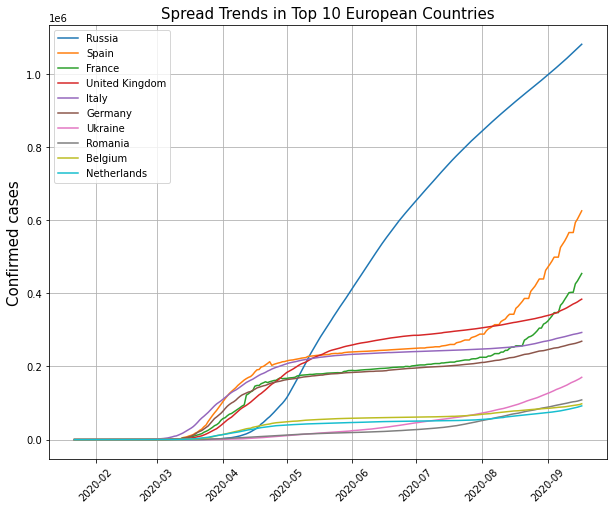

In [44]:
# Top 10 Confirmed Cases lineplot
plt.figure(figsize=(10, 8))
for index in europe_confirmed_top.index:
  sns.lineplot(x=pd.to_datetime(europe_confirmed_top.columns), y=europe_confirmed_top.loc[index, :], label=index)
plt.grid()
plt.xticks(rotation=45)
plt.ylabel("Confirmed cases", fontsize=15)
plt.title("Spread Trends in Top 10 European Countries", fontsize=15)
plt.show()

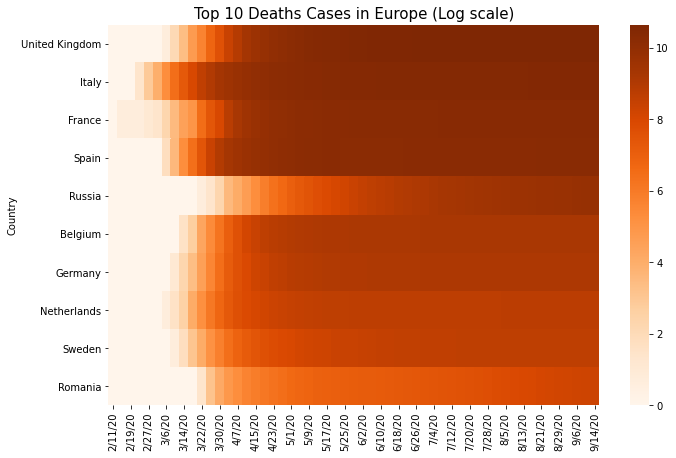

In [45]:
# Top 10 Deaths Cases Heatmap
countries = np.asarray(df_deaths.query("Continent == 'Europe'") \
  .sort_values(df_deaths.columns[-1], ascending=False).Country[:10])

europe_deaths_top = df_deaths.set_index("Country").drop(["Continent"], axis=1).loc[countries,:]
temp = europe_deaths_top.iloc[:, 20::4]
temp = np.log1p(temp)

plt.figure(figsize=(11, 7))
plt.title("Top 10 Deaths Cases in Europe (Log scale)", fontsize=15)
sns.heatmap(data=temp, cmap="Oranges")
plt.show()

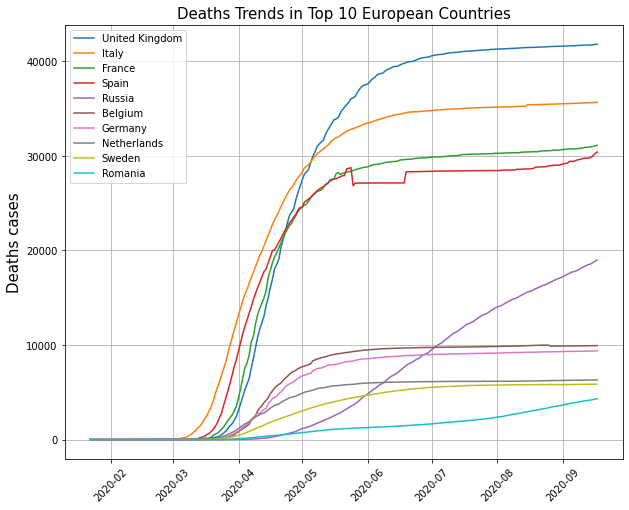

In [46]:
# Top 10 Deaths Cases lineplot
plt.figure(figsize=(10, 8))
for index in europe_deaths_top.index:
  sns.lineplot(x=pd.to_datetime(europe_deaths_top.columns), y=europe_deaths_top.loc[index, :], label=index)
plt.grid()
plt.xticks(rotation=45)
plt.ylabel("Deaths cases", fontsize=15)
plt.title("Deaths Trends in Top 10 European Countries", fontsize=15)
plt.show()

### Spread across Asia

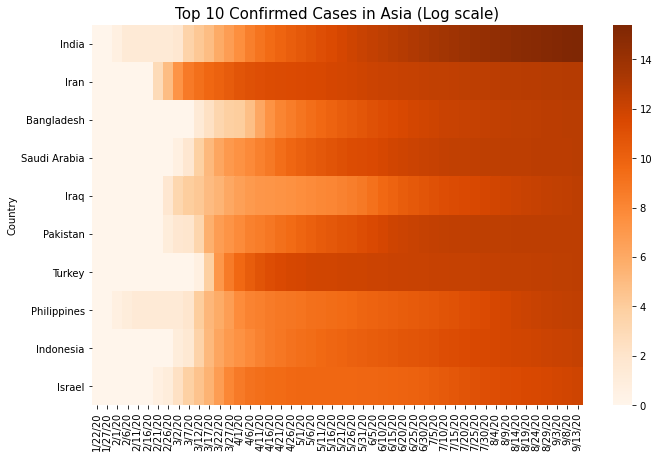

In [47]:
# Top 10 Confirmed Cases Heatmap
countries = np.asarray(df_confirmed.query("Continent == 'Asia'") \
  .sort_values(df_confirmed.columns[-1], ascending=False).Country[:10])

asia_confirmed_top = df_confirmed.set_index("Country").drop(["Continent"], axis=1).loc[countries,:]
temp = asia_confirmed_top.iloc[:, ::5]
temp = np.log1p(temp)

plt.figure(figsize=(11, 7))
plt.title("Top 10 Confirmed Cases in Asia (Log scale)", fontsize=15)
sns.heatmap(data=temp, cmap="Oranges")
plt.show()

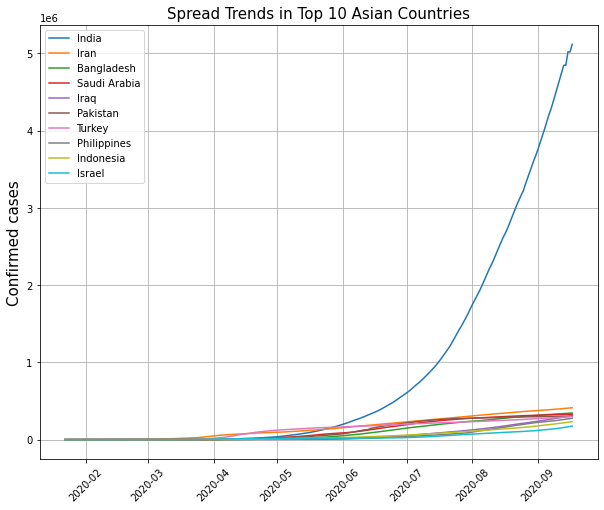

In [48]:
# Top 10 Confirmed Cases lineplot
plt.figure(figsize=(10, 8))
for index in asia_confirmed_top.index:
  sns.lineplot(x=pd.to_datetime(asia_confirmed_top.columns), y=asia_confirmed_top.loc[index, :], label=index)
plt.grid()
plt.xticks(rotation=45)
plt.ylabel("Confirmed cases", fontsize=15)
plt.title("Spread Trends in Top 10 Asian Countries", fontsize=15)
plt.show()

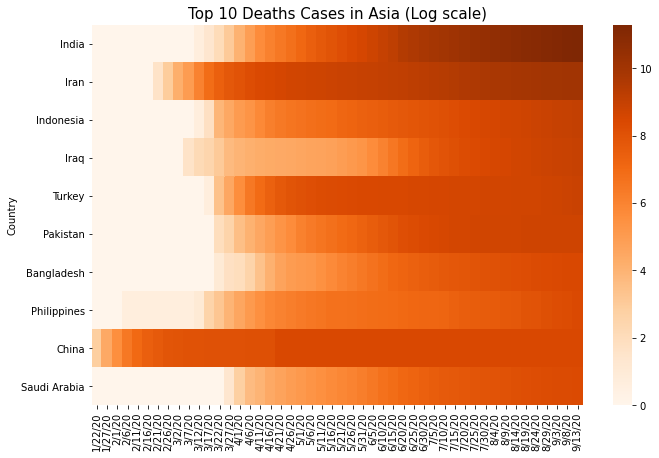

In [49]:
# Top 10 Deaths Cases Heatmap
countries = np.asarray(df_deaths.query("Continent == 'Asia'") \
  .sort_values(df_deaths.columns[-1], ascending=False).Country[:10])

asia_deaths_top = df_deaths.set_index("Country").drop(["Continent"], axis=1).loc[countries,:]
temp = asia_deaths_top.iloc[:, ::5]
temp = np.log1p(temp)

plt.figure(figsize=(11, 7))
plt.title("Top 10 Deaths Cases in Asia (Log scale)", fontsize=15)
sns.heatmap(data=temp, cmap="Oranges")
plt.show()

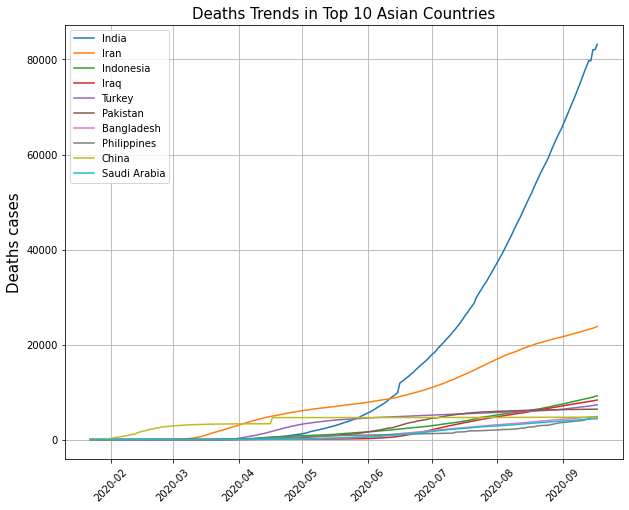

In [50]:
# Top 10 Deaths Cases lineplot
plt.figure(figsize=(10, 8))
for index in asia_deaths_top.index:
  sns.lineplot(x=pd.to_datetime(asia_deaths_top.columns), y=asia_deaths_top.loc[index, :], label=index)
plt.grid()
plt.xticks(rotation=45)
plt.ylabel("Deaths cases", fontsize=15)
plt.title("Deaths Trends in Top 10 Asian Countries", fontsize=15)
plt.show()

### Spread across North/South America (exclude USA)

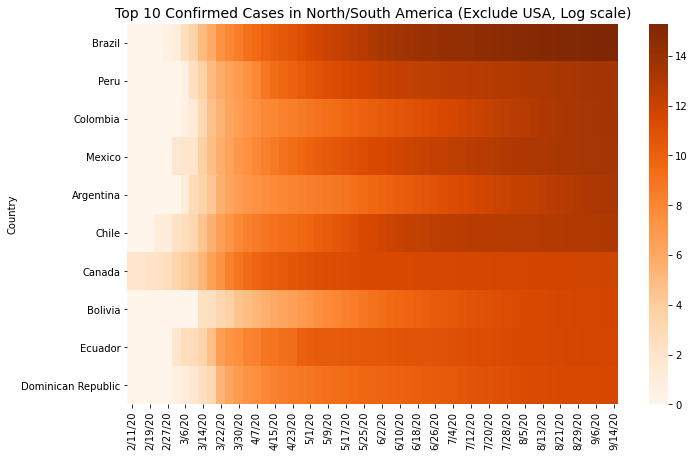

In [51]:
# Top 10 Confirmed Cases Heatmap
countries = np.asarray(df_confirmed.query("Country != 'USA'") \
  .query("Continent in ['North America', 'South America']") \
  .sort_values(df_confirmed.columns[-1], ascending=False).Country[:10])

america_confirmed_top = df_confirmed.set_index("Country").drop(["Continent"], axis=1).loc[countries,:]
temp = america_confirmed_top.iloc[:, 20::4]
temp = np.log1p(temp)

plt.figure(figsize=(11, 7))
plt.title("Top 10 Confirmed Cases in North/South America (Exclude USA, Log scale)", fontsize=14)
sns.heatmap(data=temp, cmap="Oranges")
plt.show()

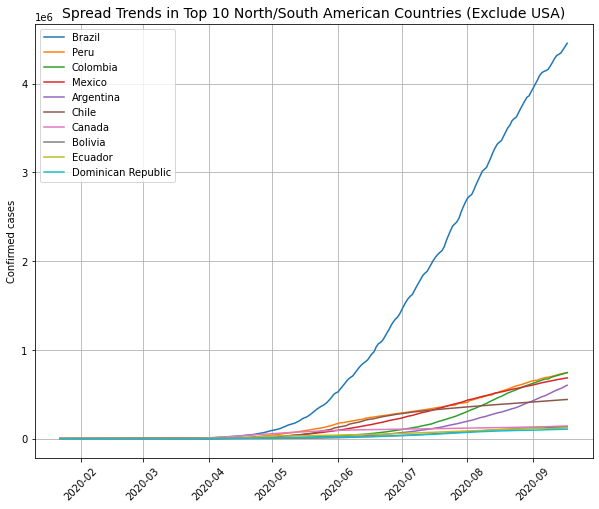

In [52]:
# Top 10 Confirmed Cases lineplot
plt.figure(figsize=(10, 8))
for index in america_confirmed_top.index:
  sns.lineplot(x=pd.to_datetime(america_confirmed_top.columns), y=america_confirmed_top.loc[index, :], label=index)
plt.grid()
plt.xticks(rotation=45)
plt.ylabel("Confirmed cases", fontsize=10)
plt.title("Spread Trends in Top 10 North/South American Countries (Exclude USA)", fontsize=14)
plt.show()

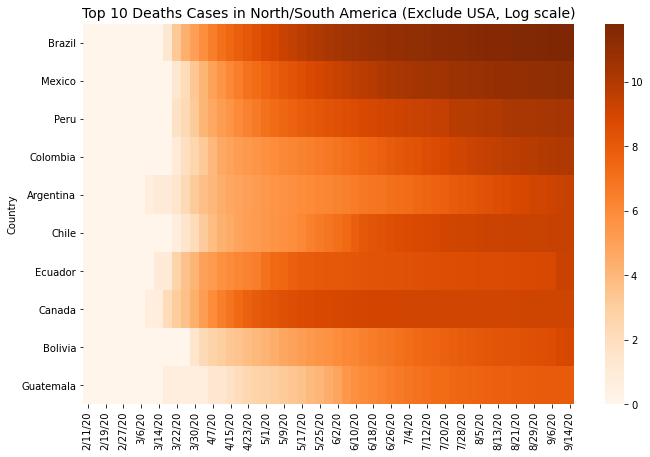

In [53]:
# Top 10 Deaths Cases Heatmap
countries = np.asarray(df_deaths.query("Country != 'USA'") \
  .query("Continent in ['North America', 'South America']") \
  .sort_values(df_deaths.columns[-1], ascending=False).Country[:10])

america_deaths_top = df_deaths.set_index("Country").drop(["Continent"], axis=1).loc[countries,:]
temp = america_deaths_top.iloc[:, 20::4]
temp = np.log1p(temp)

plt.figure(figsize=(11, 7))
plt.title("Top 10 Deaths Cases in North/South America (Exclude USA, Log scale)", fontsize=14)
sns.heatmap(data=temp, cmap="Oranges")
plt.show()

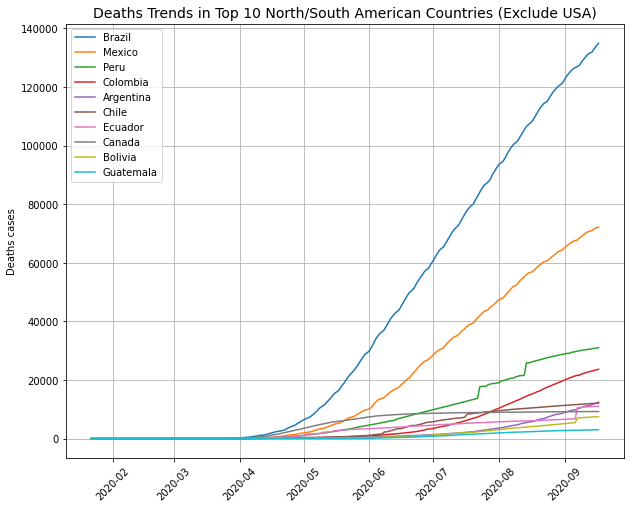

In [54]:
# Top 10 Deaths Cases lineplot
plt.figure(figsize=(10, 8))
for index in america_deaths_top.index:
  sns.lineplot(x=pd.to_datetime(america_deaths_top.columns), y=america_deaths_top.loc[index, :], label=index)
plt.grid()
plt.xticks(rotation=45)
plt.ylabel("Deaths cases", fontsize=10)
plt.title("Deaths Trends in Top 10 North/South American Countries (Exclude USA)", fontsize=14)
plt.show()

### Spread across Africa

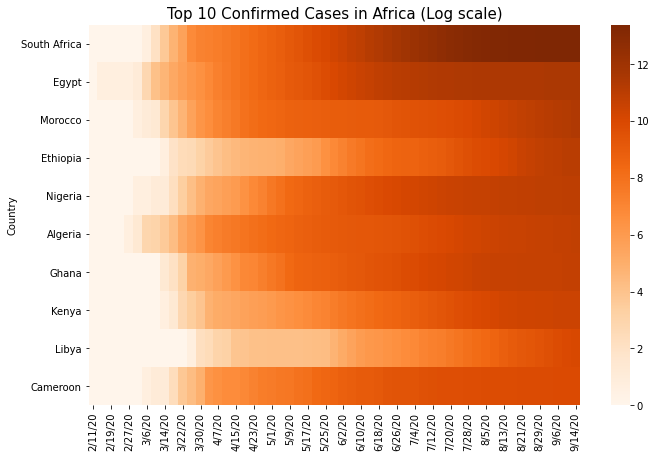

In [55]:
# Top 10 Confirmed Cases Heatmap
countries = np.asarray(df_confirmed.query("Continent == 'Africa'") \
  .sort_values(df_confirmed.columns[-1], ascending=False).Country[:10])

africa_confirmed_top = df_confirmed.set_index("Country").drop(["Continent"], axis=1).loc[countries,:]
temp = africa_confirmed_top.iloc[:, 20::4]
temp = np.log1p(temp)

plt.figure(figsize=(11, 7))
plt.title("Top 10 Confirmed Cases in Africa (Log scale)", fontsize=15)
sns.heatmap(data=temp, cmap="Oranges")
plt.show()

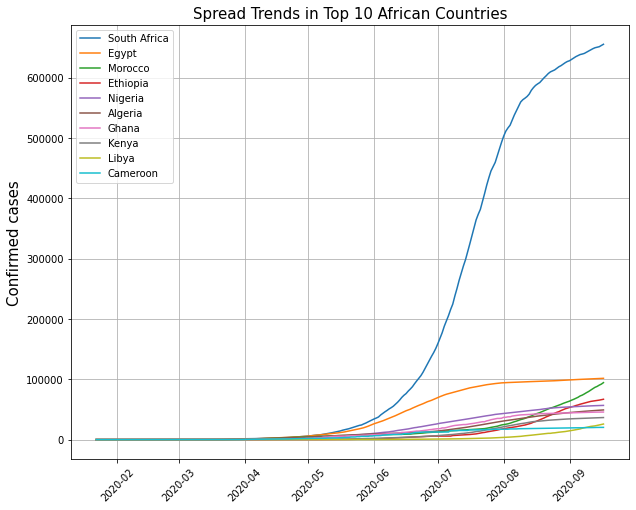

In [56]:
# Top 10 Confirmed Cases lineplot
plt.figure(figsize=(10, 8))
for index in africa_confirmed_top.index:
  sns.lineplot(x=pd.to_datetime(africa_confirmed_top.columns), y=africa_confirmed_top.loc[index, :], label=index)
plt.grid()
plt.xticks(rotation=45)
plt.ylabel("Confirmed cases", fontsize=15)
plt.title("Spread Trends in Top 10 African Countries", fontsize=15)
plt.show()

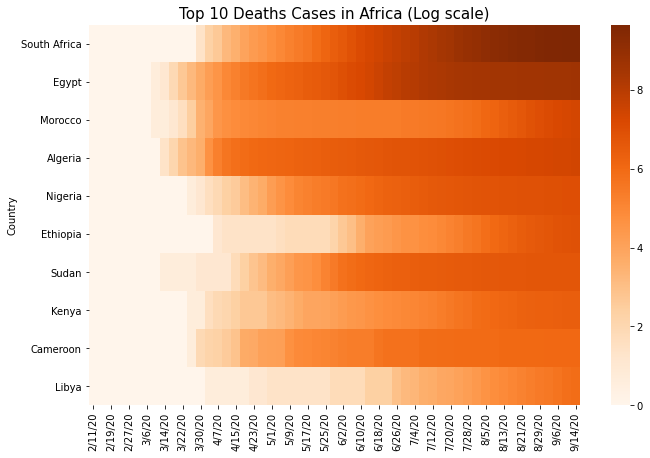

In [57]:
# Top 10 Deaths Cases Heatmap
countries = np.asarray(df_deaths.query("Continent == 'Africa'") \
  .sort_values(df_deaths.columns[-1], ascending=False).Country[:10])

africa_deaths_top = df_deaths.set_index("Country").drop(["Continent"], axis=1).loc[countries,:]
temp = africa_deaths_top.iloc[:, 20::4]
temp = np.log1p(temp)

plt.figure(figsize=(11, 7))
plt.title("Top 10 Deaths Cases in Africa (Log scale)", fontsize=15)
sns.heatmap(data=temp, cmap="Oranges")
plt.show()

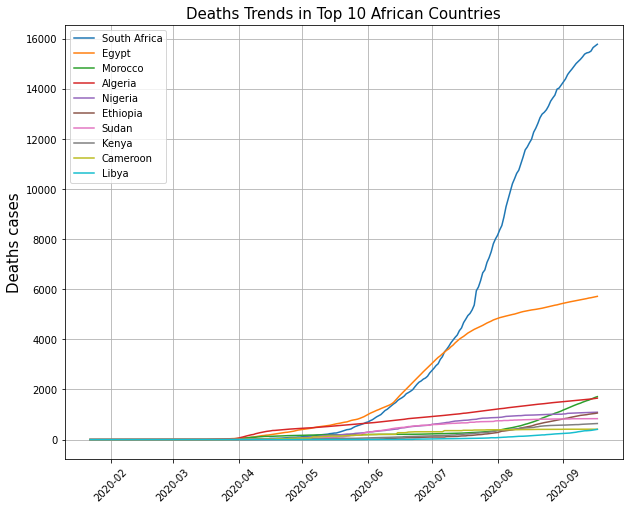

In [58]:
# Top 10 Deaths Cases lineplot
plt.figure(figsize=(10, 8))
for index in africa_deaths_top.index:
  sns.lineplot(x=pd.to_datetime(africa_deaths_top.columns), y=africa_deaths_top.loc[index, :], label=index)
plt.grid()
plt.xticks(rotation=45)
plt.ylabel("Deaths cases", fontsize=15)
plt.title("Deaths Trends in Top 10 African Countries", fontsize=15)
plt.show()

### Spread across USA

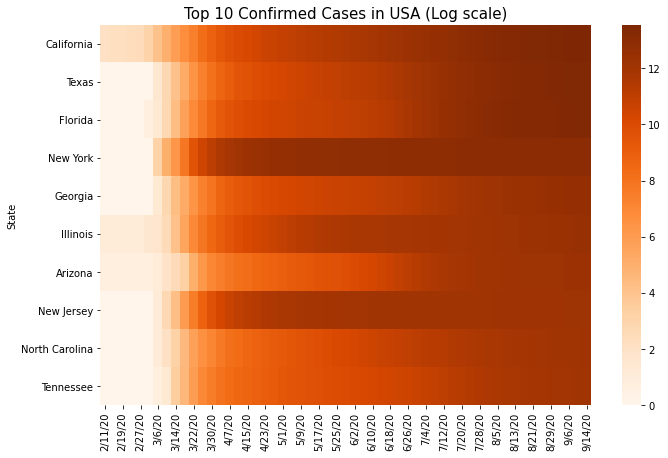

In [59]:
# Top 10 Confirmed Cases Heatmap
states = np.asarray(us_confirmed \
  .sort_values(us_confirmed.columns[-1], ascending=False).State[:10])

us_confirmed_top = us_confirmed.set_index("State").drop(["Population"], axis=1).loc[states,:]
temp = us_confirmed_top.iloc[:, 20::4]
temp = np.log1p(temp)

plt.figure(figsize=(11, 7))
plt.title("Top 10 Confirmed Cases in USA (Log scale)", fontsize=15)
sns.heatmap(data=temp, cmap="Oranges")
plt.show()

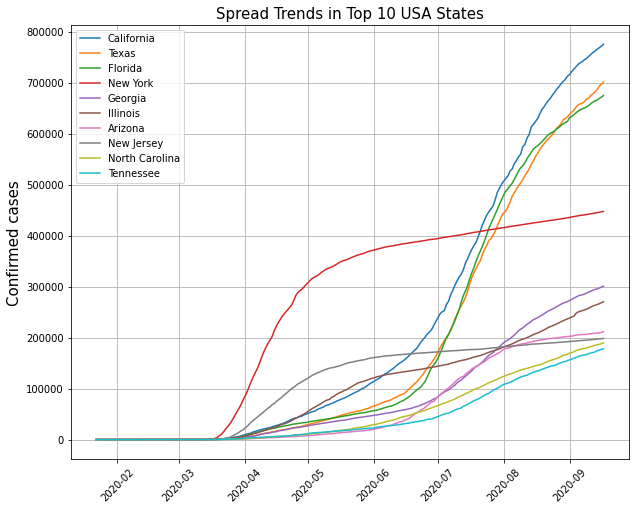

In [60]:
# Top 10 Confirmed Cases lineplot
plt.figure(figsize=(10, 8))
for index in us_confirmed_top.index:
  sns.lineplot(x=pd.to_datetime(us_confirmed_top.columns), y=us_confirmed_top.loc[index, :], label=index)
plt.grid()
plt.xticks(rotation=45)
plt.ylabel("Confirmed cases", fontsize=15)
plt.title("Spread Trends in Top 10 USA States", fontsize=15)
plt.show()

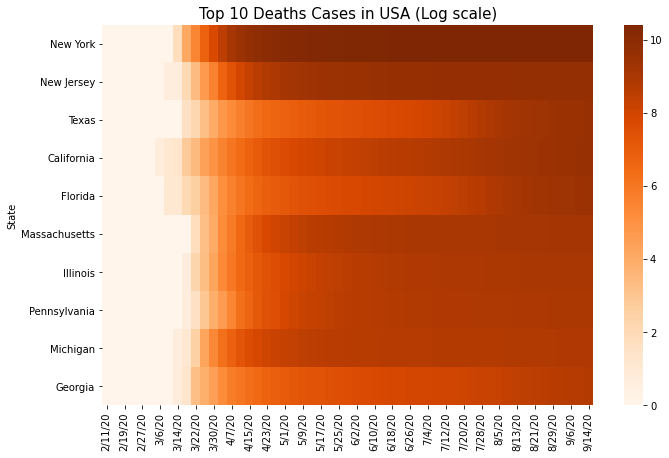

In [61]:
# Top 10 Deaths Cases Heatmap
states = np.asarray(us_deaths \
  .sort_values(us_deaths.columns[-1], ascending=False).State[:10])

us_deaths_top = us_deaths.set_index("State").drop(["Population"], axis=1).loc[states,:]
temp = us_deaths_top.iloc[:, 20::4]
temp = np.log1p(temp)

plt.figure(figsize=(11, 7))
plt.title("Top 10 Deaths Cases in USA (Log scale)", fontsize=15)
sns.heatmap(data=temp, cmap="Oranges")
plt.show()

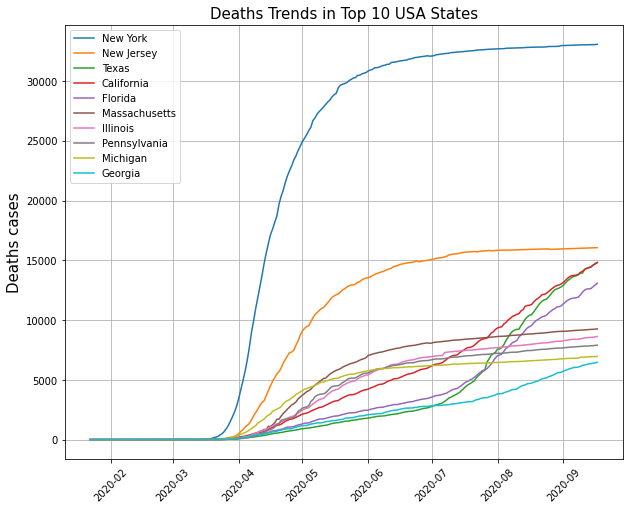

In [62]:
# Top 10 Deaths Cases lineplot
plt.figure(figsize=(10, 8))
for index in us_deaths_top.index:
  sns.lineplot(x=pd.to_datetime(us_deaths_top.columns), y=us_deaths_top.loc[index, :], label=index)
plt.grid()
plt.xticks(rotation=45)
plt.ylabel("Deaths cases", fontsize=15)
plt.title("Deaths Trends in Top 10 USA States", fontsize=15)
plt.show()

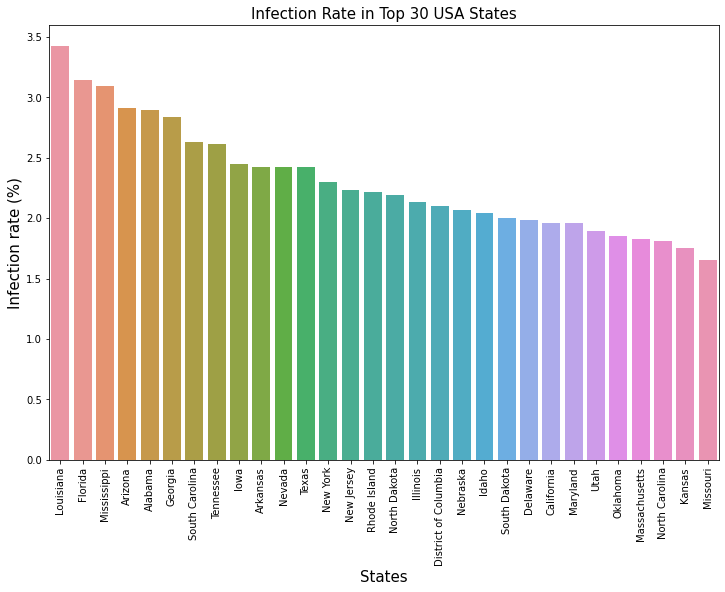

In [63]:
# Top 30 infection rate in the USA
rate = (us_confirmed.iloc[:, -1] / us_confirmed.Population * 100).round(3)
us_infection_rate = us_confirmed.State.to_frame().join(rate.to_frame(name="InfectionRate"))
us_infection_rate.InfectionRate.replace(np.inf, 0.000, inplace=True)

us_rate_top = us_infection_rate.sort_values("InfectionRate", ascending=False).iloc[:30]

plt.figure(figsize=(12, 8))
sns.barplot(x=us_rate_top.State, y=us_rate_top.InfectionRate)
plt.xticks(rotation=90)
plt.ylabel("Infection rate (%)", fontsize=15)
plt.xlabel("States", fontsize=15)
plt.title("Infection Rate in Top 30 USA States", fontsize=15)
plt.show()

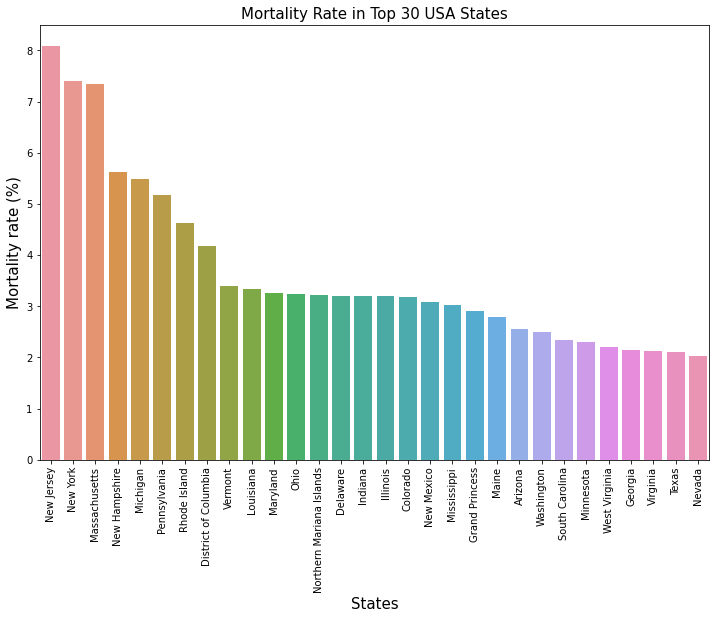

In [64]:
# Top 30 mortality rate in the USA
deaths_rate = (us_deaths.iloc[:, -1] / us_confirmed.iloc[:, -1] * 100).round(3)
us_mortality_rate = us_deaths.State.to_frame().join(deaths_rate.to_frame(name="InfectionRate"))
us_mortality_rate.InfectionRate.replace(np.inf, 0.000, inplace=True)

us_mortality_rate_top = us_mortality_rate.sort_values("InfectionRate", ascending=False).iloc[1:31]

plt.figure(figsize=(12, 8))
sns.barplot(x=us_mortality_rate_top.State, y=us_mortality_rate_top.InfectionRate)
plt.xticks(rotation=90)
plt.ylabel("Mortality rate (%)", fontsize=15)
plt.xlabel("States", fontsize=15)
plt.title("Mortality Rate in Top 30 USA States", fontsize=15)
plt.show()